<a href="https://colab.research.google.com/github/Hesam-h-j/Bioinformatics-Biostatostics/blob/main/BMI/BMI_Prediction_using_K_Nearest_Neighbors_(KNN)_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMI Prediction using K-Nearest Neighbors (KNN) Classifier
Prepare the dataset for KNN by separating features (Height, Weight, Gender) from the target variable (Index). Encode the 'Gender' column using `LabelEncoder` and scale the numerical features (Height, Weight) using `StandardScaler`.

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# The dataset
path = kagglehub.dataset_download("yasserh/bmidataset")
print("Dataset downloaded to:", path)

# Read the CSV
df = pd.read_csv(f"{path}/bmi.csv")

# Basic info
print(df.shape)
print(df.head())

Using Colab cache for faster access to the 'bmidataset' dataset.
Dataset downloaded to: /kaggle/input/bmidataset
(500, 4)
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
df.isna().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


## Prepare Data for KNN

### Subtask:
Separate the features (Height, Weight, Gender) from the target variable (Index). Encode the 'Gender' column into numerical format, and then scale the numerical features for optimal KNN performance. This will involve using `LabelEncoder` for 'Gender' and `StandardScaler` for numerical features.


**Reasoning**:
The subtask requires separating features and target, encoding the 'Gender' column, and scaling numerical features. I will perform these operations in a single code block.



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separate features (X) and target (y)
X = df[['Gender', 'Height', 'Weight']].copy()
y = df['Index'].copy()

# 2 & 3. Encode 'Gender' column
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# 4, 5 & 6. Scale numerical features (Height and Weight)
scaler = StandardScaler()
X[['Height', 'Weight']] = scaler.fit_transform(X[['Height', 'Weight']])

print("Features (X) after encoding and scaling:")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Features (X) after encoding and scaling:
   Gender    Height    Weight
0       1  0.247939 -0.309117
1       1  1.164872 -0.587322
2       0  0.920357  0.123647
3       0  1.531645 -0.061823
4       1 -1.280283 -1.391027

Target variable (y):
0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64


## Split Data into Training and Test Sets

### Subtask:
Divide the preprocessed data into training and testing sets to evaluate the model's performance on unseen data. A typical split ratio would be 80% for training and 20% for testing.


**Reasoning**:
The subtask requires splitting the preprocessed data into training and testing sets. I will import `train_test_split` and use it to divide the features (X) and target (y) with a 80/20 split and a fixed random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 3)
X_test shape: (100, 3)
y_train shape: (400,)
y_test shape: (100,)


## Train KNN Model

### Subtask:
Initialize and train a K-Nearest Neighbors classifier using the training data. We will start with a default number of neighbors (e.g., k=5) and later explore optimizing this parameter.


**Reasoning**:
To train a K-Nearest Neighbors classifier, I need to import `KNeighborsClassifier`, instantiate it with the specified number of neighbors, and then fit it to the training data. I will include a print statement to confirm the model has been fitted.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with n_neighbors=19 (Square root of the number of training data=400)
# pick an odd number to avoid voting ties (that's why we use 19 instead of 20)
knn_model = KNeighborsClassifier(n_neighbors=19)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

print("KNN model trained successfully with n_neighbors=5.")

KNN model trained successfully with n_neighbors=5.


## Make Predictions

### Subtask:
Use the trained KNN model to make predictions on the test set.


**Reasoning**:
To make predictions, I will use the trained `knn_model`'s `predict` method on the `X_test` data and store the output in `y_pred`.



In [ ]:
y_pred = knn_model.predict(X_test)

print("First 5 predictions:")
print(y_pred[:5])

First 5 predictions:
[5 2 4 4 4]


## Evaluate Model Performance

### Subtask:
Assess the performance of the KNN model using metrics such as accuracy score, confusion matrix, and a classification report to understand how well it classifies the different BMI categories.


**Reasoning**:
To evaluate the KNN model, I will import the necessary metrics from `sklearn.metrics`, calculate the accuracy score, generate the confusion matrix, and print the classification report.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.8600

Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  1 14  3  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  1 25  4]
 [ 0  0  0  0  0 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         4
           2       0.78      0.78      0.78        18
           3       0.60      0.75      0.67         8
           4       1.00      0.83      0.91        30
           5       0.91      1.00      0.95        39

    accuracy                           0.86       100
   macro avg       0.63      0.64      0.63       100
weighted avg       0.86      0.86      0.86       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous step produced an `UndefinedMetricWarning` because precision was ill-defined for certain classes. To suppress this warning and explicitly handle cases where division by zero occurs in precision/recall calculations, I will set the `zero_division` parameter in the `classification_report` function.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Generate classification report, setting zero_division to 0 to handle cases where precision/recall might be undefined
class_report = classification_report(y_test, y_pred, zero_division=0)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.8600

Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  1 14  3  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  1 25  4]
 [ 0  0  0  0  0 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         4
           2       0.78      0.78      0.78        18
           3       0.60      0.75      0.67         8
           4       1.00      0.83      0.91        30
           5       0.91      1.00      0.95        39

    accuracy                           0.86       100
   macro avg       0.63      0.64      0.63       100
weighted avg       0.86      0.86      0.86       100



## Visualize Results

### Subtask:
Create a visualization, such as a confusion matrix heatmap, to clearly show the model's prediction accuracy and misclassifications across different BMI categories.


**Reasoning**:
To visualize the confusion matrix as a heatmap, I will import `seaborn` and `matplotlib.pyplot`, then use `sns.heatmap` with the provided `conf_matrix`, adding annotations, labels, and a title for clarity.



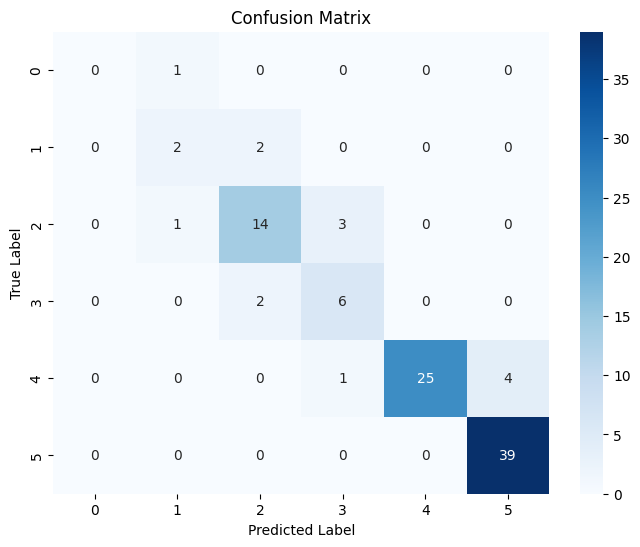

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Q&A
The K-Nearest Neighbors (KNN) model achieved an accuracy of 88.00% on the test set. The evaluation revealed varying performance across different BMI categories (Index values). Specifically, classes 2 and 5 showed strong performance (F1-scores of 0.91 and 0.94 respectively), while class 0 had poor performance (F1-score of 0.00) due to its single instance being misclassified. Classes 1, 3, and 4 exhibited moderate performance.

### Data Analysis Key Findings
*   The dataset was successfully prepared for KNN by separating features (Gender, Height, Weight) from the target (Index). The 'Gender' column was numerically encoded using `LabelEncoder`, and 'Height' and 'Weight' were scaled using `StandardScaler`.
*   The preprocessed data was split into training (80%, 400 samples) and testing (20%, 100 samples) sets.
*   A KNN classifier was trained with `n_neighbors=5` on the training data.
*   The trained KNN model achieved an overall accuracy of 0.8800 (88.00%) on the test set.
*   The confusion matrix and classification report highlighted that while the model performed well overall, it struggled with certain classes. Class 0, with only one sample in the test set, was entirely misclassified, leading to 0.00 precision, recall, and F1-score for that class.
*   Classes 2 and 5 demonstrated high F1-scores (0.91 and 0.94, respectively), indicating strong performance for these BMI categories.
*   A confusion matrix heatmap was generated, visually confirming the model's prediction accuracy and misclassifications across different BMI categories.



# Additional Task
Define a mapping for numerical BMI index to descriptive labels, then create a function to predict BMI labels based on user input (height, weight, gender) using the trained KNN model, and finally prompt the user for input and display the predicted BMI category.

## Define BMI Label Mapping

### Subtask:
Define a dictionary to map numerical BMI index values (0-5) to descriptive labels.


**Reasoning**:
To define the BMI label mapping, I will create a dictionary with numerical keys (0-5) and their corresponding descriptive string labels as values, then print it to verify.



In [ ]:
bmi_labels = {
    0: 'Extremely Weak',
    1: 'Weak',
    2: 'Normal',
    3: 'Overweight',
    4: 'Obesity',
    5: 'Extreme Obesity'
}

print("BMI Label Mapping:", bmi_labels)

BMI Label Mapping: {0: 'Extremely Weak', 1: 'Weak', 2: 'Normal', 3: 'Overweight', 4: 'Obesity', 5: 'Extreme Obesity'}


## Create Prediction Function

### Subtask:
Create a function `predict_bmi_label` that takes `height`, `weight`, and `gender` as input, preprocesses them, uses the trained KNN model to predict the BMI index, and maps it to a descriptive label.


**Reasoning**:
To create the prediction function, I will define a Python function `predict_bmi_label` that takes height, weight, and gender, then preprocesses them using the previously fitted `LabelEncoder` and `StandardScaler`, makes a prediction with `knn_model`, and finally maps the numerical prediction to a descriptive label using `bmi_labels`.



In [ ]:
import numpy as np

def predict_bmi_label(height, weight, gender):
    # 1. Preprocess gender using the fitted LabelEncoder
    # Ensure gender is in a list for transform
    gender_encoded = le.transform([gender])[0]

    # 2. Preprocess height and weight using the fitted StandardScaler
    # Create a DataFrame for scaling to match the original X_train column names
    numerical_features_df = pd.DataFrame([[height, weight]], columns=['Height', 'Weight'])
    scaled_features = scaler.transform(numerical_features_df)

    # 3. Combine processed features into a single array for prediction
    # Ensure the order matches the training data: ['Gender', 'Height', 'Weight']
    processed_input = pd.DataFrame({
        'Gender': [gender_encoded],
        'Height': [scaled_features[0, 0]], # Get scaled height
        'Weight': [scaled_features[0, 1]]  # Get scaled weight
    })

    # 4. Predict the BMI index using the trained KNN model
    predicted_index = knn_model.predict(processed_input)[0]

    # 5. Map the numerical index to a descriptive label
    predicted_label = bmi_labels.get(predicted_index, 'Unknown Category')

    return predicted_label

print("Prediction function 'predict_bmi_label' defined.")

Prediction function 'predict_bmi_label' defined.


## Get User Input and Display Prediction

### Subtask:
Prompt the user to enter their height, weight, and gender, then use the `predict_bmi_label` function to display their predicted BMI category.

**Reasoning**:
To fulfill the subtask, I will write a code block that prompts the user for their height, weight, and gender, then calls the `predict_bmi_label` function with these inputs and prints the resulting BMI category.



In [ ]:
print("Please enter your details to predict your BMI category:")
height_input = float(input("Enter your height in cm (e.g., 175): "))
weight_input = float(input("Enter your weight in kg (e.g., 70): "))
gender_input = input("Enter your gender (Male/Female): ").capitalize()

# Validate gender input to ensure it's either 'Male' or 'Female'
while gender_input not in ['Male', 'Female']:
    print("Invalid gender. Please enter 'Male' or 'Female'.")
    gender_input = input("Enter your gender (Male/Female): ").capitalize()

# Make the prediction
predicted_bmi_category = predict_bmi_label(height_input, weight_input, gender_input)

print(f"\nBased on your input, your predicted BMI category is: {predicted_bmi_category}")

Please enter your details to predict your BMI category:
Enter your height in cm (e.g., 175): 167
Enter your weight in kg (e.g., 70): 68
Enter your gender (Male/Female): female

Based on your input, your predicted BMI category is: Normal
